# **UNIVERSIDAD ESTATAL A DISTANCIA**
TALLER INTRODUCCION A CIENCIA DE DATOS

**SESION #1**

# Preprocesamiento de datos - Caso TITANIC

In [67]:
import numpy as np
import pandas as pd

In [68]:
 data =  pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/UNED/master/titanic.csv')


In [69]:
data.shape

(891, 12)

In [71]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Podemos seleccionar el arreglo de columas que sean de nuestro interés:

In [72]:
cols_to_use = ['Pclass', 'Sex', 'Age','Fare','Survived']

In [73]:
data = data[cols_to_use]

In [74]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
5,3,male,NaN,8.4583,0
6,1,male,54.0,51.8625,0
7,3,male,2.0,21.0750,0
8,3,female,27.0,11.1333,1
9,2,female,14.0,30.0708,1


Validamos la existencia de NaN:

In [75]:
data.isnull().values.any()

True

Validamos el tamaño original del dataset:

In [76]:
data.shape

(891, 5)

Decidimos eliminar cualquier instancia que contenga al menos, un NaN:

In [77]:
data = data.dropna()

y verificamos el tamaño final del dataset:

In [78]:
data.shape

(714, 5)

Notamos como 177 instancias fueron eliminadas.

# ¿Qué sigue? Debemos de verificar si hay alguna variable categórica, de existir debemos de binarizarla:

In [79]:
data['Sex'] = data['Sex'].replace({'male' : 0, 'female' : 1})

In [81]:
data.head(10)

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
6,1,0,54.0,51.8625,0
7,3,0,2.0,21.0750,0
8,3,1,27.0,11.1333,1
9,2,1,14.0,30.0708,1
10,3,1,4.0,16.7000,1


Finalmente como etapa previa a los algoritmos de aprendizaje, partimos nuestro dataset en *training* y *testing*:

In [82]:
from sklearn.model_selection import train_test_split

Creamos nuestro conjunto de features (X) y labels (y):

In [83]:
features = data[['Sex','Age','Fare']]
labels = data['Survived']

In [47]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, random_state = 13)

In [84]:
data.shape

(714, 5)

In [85]:
X_train.shape

(571, 3)

In [86]:
y_test.shape

(143,)

Nótese como por defecto el tamaño de *training* es del 75% (535/714) y *testing* del 25% (179/714), si deseamos una partición distinta, por ejemplo 80% *training* y 20% *testing*, lo hacemos de la siguiente manera:

In [95]:
X_train,X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state = 13) 

In [96]:
X_train.shape

(428, 3)

Efectivamente ahora 571 corresponde al 80% de 714.

# **CORRELACION DE DATOS GRAFICA**

In [102]:
import seaborn as sns


In [99]:
#data.corr()

,Pclass,Sex,Age,Fare,Survived
Pclass,1.000000,-0.155460,-0.369226,-0.554182,-0.359653
Sex,-0.155460,1.000000,-0.093254,0.184994,0.538826
Age,-0.369226,-0.093254,1.000000,0.096067,-0.077221
Fare,-0.554182,0.184994,0.096067,1.000000,0.268189
Survived,-0.359653,0.538826,-0.077221,0.268189,1.000000


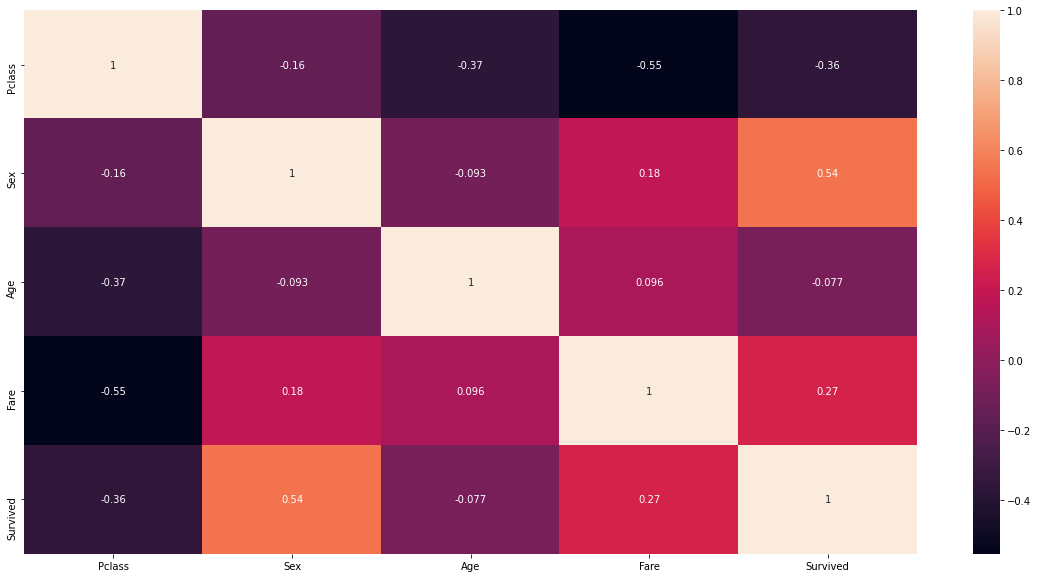

In [101]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

# SESION #2 - MODELOS


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/diamonds.csv')
datos2 = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/diamonds.csv')

In [3]:
datos.shape  

(53940, 11)

In [4]:
datos.head (5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
datos.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


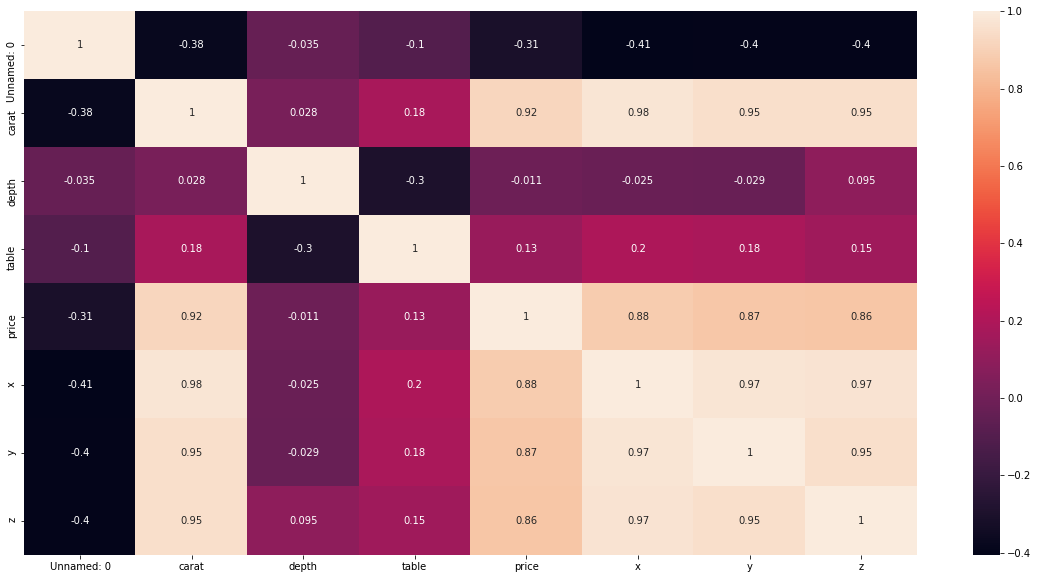

In [6]:
plt.figure(figsize=(20, 10))
sns.heatmap(datos.corr(), annot=True)

## **NORMALIZAR LOS DATOS**

In [3]:
#Paso 1 - asignar 0 a los datos nulos
datos = datos.fillna(0)
datos2 = datos2.fillna(0)

In [4]:
#Paso 2 - Normalizar los datos para que esten en el intervalo (0,1)
processed_dataP = datos
processed_dataP["PRICE"] = processed_dataP["price"]/datos["price"].max()
processed_dataP["X"] = processed_dataP["x"]/datos["x"].max()
processed_dataP["Y"] = processed_dataP["y"]/datos["y"].max()
processed_dataP["Z"] = processed_dataP["z"]/datos["z"].max()

In [5]:
print("Muestra de los Datos")
processed_dataP.head(10)

Muestra de los Datos


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,PRICE,X,Y,Z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.017319,0.367784,0.067572,0.076415
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.017319,0.362197,0.065195,0.072642
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.017372,0.377095,0.069100,0.072642
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.017744,0.391061,0.071817,0.082704
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.017797,0.404097,0.073854,0.086478
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0.017851,0.366853,0.067233,0.077987
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,0.017851,0.367784,0.067572,0.077673
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0.017904,0.378957,0.069779,0.079560
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,0.017904,0.360335,0.064177,0.078302
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0.017957,0.372439,0.068761,0.075157


In [6]:
#REPETIMOS Paso 2 SUSTITUYENDO- Normalizar los datos para que esten en el intervalo (0,1)
processed_data = datos2
processed_data["price"] = processed_data["price"]/datos2["price"].max()
processed_data["x"] = processed_data["x"]/datos2["x"].max()
processed_data["y"] = processed_data["y"]/datos2["y"].max()
processed_data["z"] = processed_data["z"]/datos2["z"].max()

In [7]:
print("Muestra de los Datos")
processed_data.head(10)

Muestra de los Datos


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,0.017319,0.367784,0.067572,0.076415
1,2,0.21,Premium,E,SI1,59.8,61.0,0.017319,0.362197,0.065195,0.072642
2,3,0.23,Good,E,VS1,56.9,65.0,0.017372,0.377095,0.069100,0.072642
3,4,0.29,Premium,I,VS2,62.4,58.0,0.017744,0.391061,0.071817,0.082704
4,5,0.31,Good,J,SI2,63.3,58.0,0.017797,0.404097,0.073854,0.086478
5,6,0.24,Very Good,J,VVS2,62.8,57.0,0.017851,0.366853,0.067233,0.077987
6,7,0.24,Very Good,I,VVS1,62.3,57.0,0.017851,0.367784,0.067572,0.077673
7,8,0.26,Very Good,H,SI1,61.9,55.0,0.017904,0.378957,0.069779,0.079560
8,9,0.22,Fair,E,VS2,65.1,61.0,0.017904,0.360335,0.064177,0.078302
9,10,0.23,Very Good,H,VS1,59.4,61.0,0.017957,0.372439,0.068761,0.075157


## OUTLIERS

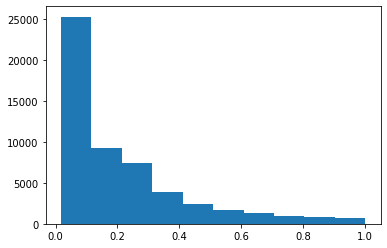

In [13]:
plt.hist(datoReducidos["price"])
plt.show()

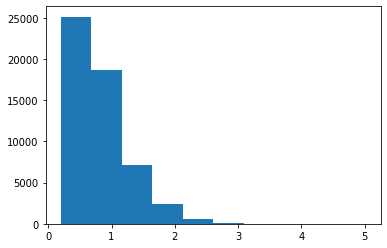

In [16]:
plt.hist(datoReducidos["carat"])
plt.show()

## **ONE HOT ENCODE**

In [19]:
#TAREA

### **ELIMINAR COLUMNAS**

In [8]:
datoReducidos = datos2


In [9]:
del datoReducidos['Unnamed: 0'] #eliminar la columna de autonumeración
del datoReducidos['depth'] #eliminar la columna de depth
del datoReducidos['table'] #eliminar la columna de table
del datoReducidos['cut'] #eliminar la columna de corte
del datoReducidos['color'] #eliminar la columna de color
del datoReducidos['clarity'] #eliminar la columna de claridad


In [14]:
datoReducidos.head()

,carat,price,x,y,z
0,0.23,0.017319,0.367784,0.067572,0.076415
1,0.21,0.017319,0.362197,0.065195,0.072642
2,0.23,0.017372,0.377095,0.069100,0.072642
3,0.29,0.017744,0.391061,0.071817,0.082704
4,0.31,0.017797,0.404097,0.073854,0.086478


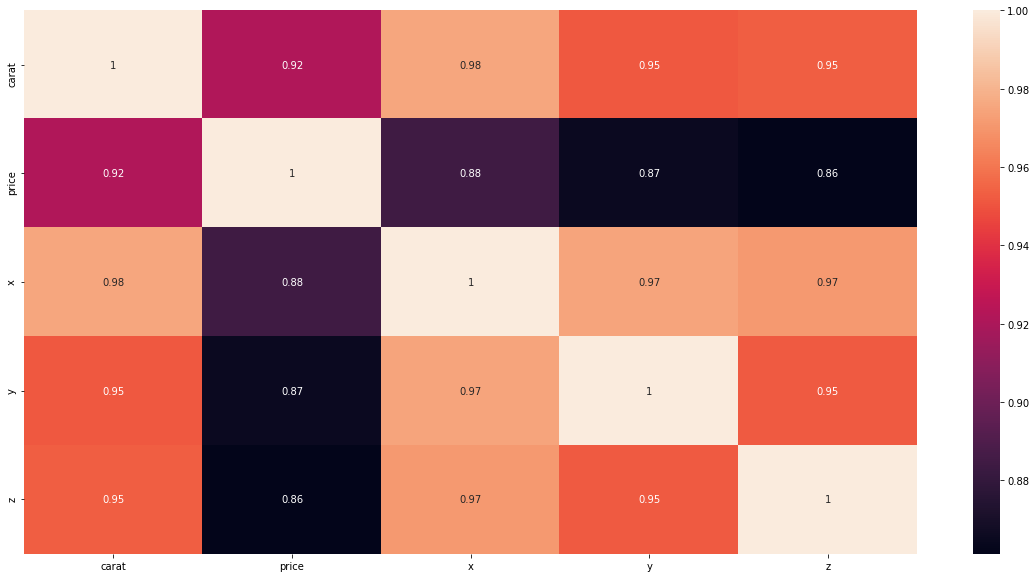

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(datoReducidos.corr(), annot=True)

## Visualización por Combinación

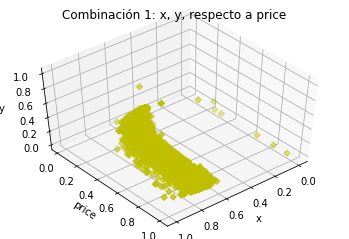

In [11]:
#GRAFICAR LA PRIMERA COMBINACION
fig = plt.figure()
ax = fig.add_subplot (111, projection='3d')


ax.scatter(datoReducidos['x'], datoReducidos['price'], datoReducidos['y'], c='y', marker='D')

ax.set_xlabel('x')
ax.set_ylabel('price')
ax.set_zlabel('y')

fig.subplots_adjust(bottom=0.1) 
ax.view_init(50,50)

plt.title("Combinación 1: x, y, respecto a price")
plt.show()

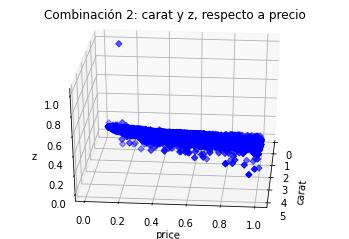

In [12]:
#GRAFICAR LA SEGUNDA COMBINACION
fig = plt.figure()
ax = fig.add_subplot (111, projection='3d')


ax.scatter(datoReducidos['carat'], datoReducidos['price'], datoReducidos['z'], c='b', marker='D')

ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.set_zlabel('z')

fig.subplots_adjust(bottom=0.1) 
ax.view_init(30,5)

plt.title("Combinación 2: carat y z, respecto a precio")
plt.show()


## **REGRESION LINEAL**

In [103]:
from sklearn.linear_model import LinearRegression

In [106]:
lr = LinearRegression().fit(X_train, y_train)

In [107]:
lr.score(X_train, y_train)


0.29757402349036377

In [108]:
lr.score(X_test, y_test)

0.34877133270151583

## **REGRESION LOGISTICA**

In [110]:
from sklearn.linear_model import LogisticRegression

**Entrenar el modelo**

In [111]:
lg = LogisticRegression().fit(X_train, y_train)

In [112]:
lg.score(X_train, y_train)

0.7710280373831776

In [113]:
lg.score(X_test, y_test)

0.7902097902097902

a